## Lab 5

### Grab the sequences from the paper:

Riboswitch Name | OBS-1 | OBS-2 | Red-1 | Red-2
------------ | ------------ | ------------ | ------------ | ------------
YES-1 | AGCUCGUCACUGUCCAGGUUCA | None | GCUUGA | UCAGGC
NOT-1 | GACACACACCACUAAACCGUGCA | None | ACGC | GCGU
AND-1 | UUACAGCUCCAUACAU | GUGUUAUCCCUAUGCA | GCUUGGUU | GAUCAGGC
OR-1 | UAUUUACAGCUCCAUACAUG | AGGUGUUCUCCCUACGCAAG | GCUUGGUUGAG | UUCGAUCAGGC

### Generating one plot per riboswitch with default parameters:

In [1]:
import subprocess

In [2]:
y = open('yes1.txt', 'r')
yes1 = y.read()

py = subprocess.run(['RNAfold'], input=bytes(yes1, 'ascii'), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print(py.stdout.decode())

GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.(((((((((.......))))))))).((.((.(((...))).))))..(((((....))))).)))))))) (-33.00)



**This is the output image:**
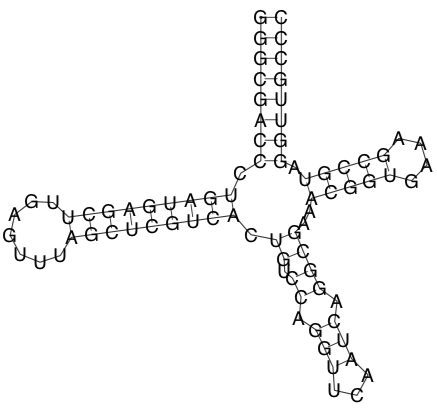

**This is the impage for YES-1 from the paper:**
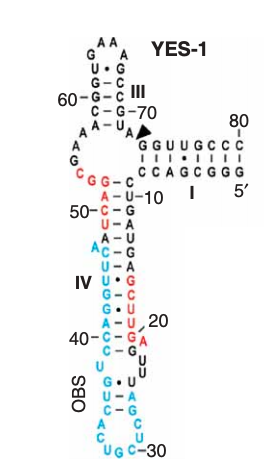

**Comparison between my YES-1 and the paper's YES-1:**
Same features: stem I and III and the first loop.
Different features: stem IV becomes 2 stems in my image.

According to the Method section, the authors use different search algorithms. This may be the reason for the difference.

In [3]:
# Do the same operation for not-1, and-1, and or-1:

n = open('not1.txt', 'r')
not1 = n.read()

pn = subprocess.run(['RNAfold'], input=bytes(not1, 'ascii'), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print(pn.stdout.decode())

GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) (-28.10)



**Image for NOT-1:**

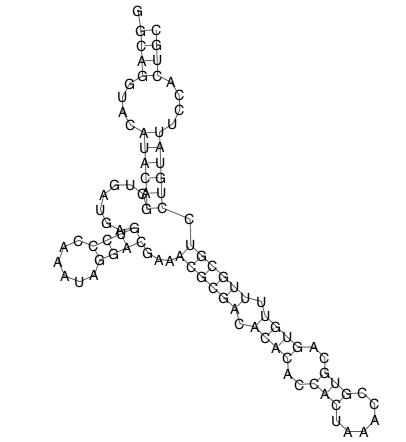

In [4]:
a = open('and1.txt', 'r')
and1 = a.read()

pa = subprocess.run(['RNAfold'], input=bytes(and1, 'ascii'), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print(pa.stdout.decode())

GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((...(((.....(((.(((.......))).))).....)))..))))))).))))).....(((((....))))).))))))))......... (-42.10)



**Image for AND-1:**

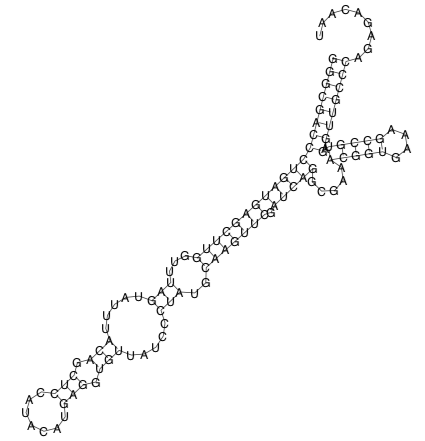

In [5]:
o = open('or1.txt', 'r')
or1 = o.read()

po = subprocess.run(['RNAfold'], input=bytes(or1, 'ascii'), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print(po.stdout.decode())

GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((.....(((.(((.......))).))).)))...)).))))))).))))).....(((((....))))).)))))))) (-40.00)



**Image for OR-1:**

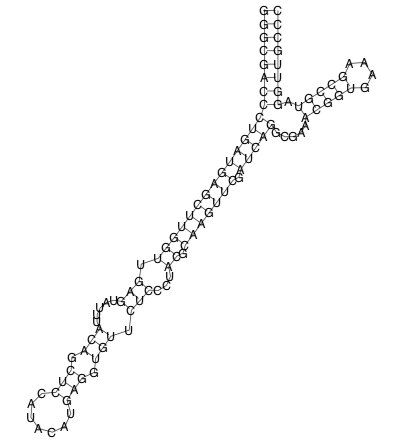

### Simulate OBS binding in YES-1 and NOT-1:

In [6]:
y2 = open('yes1_contraints.txt', 'r')
yes1_constraints = y2.read()

py2 = subprocess.run(['RNAfold', '-C'], input=bytes(yes1_constraints, 'ascii'), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print(py2.stdout.decode())

GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......((((((...........................))))))...(((((....))))).)))))))) (-24.50)



**Image for YES-1 when its target OBS is bound:**

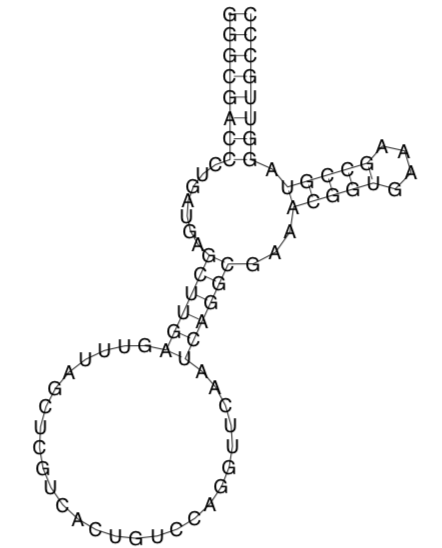

**This is the image from the paper:**

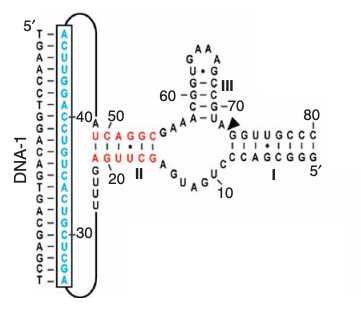

The 2 images look similar, and the red regions are bound to each other.

In [7]:
n2 = open('not1_contraints.txt', 'r')
not1_contraints = n2.read()

pn2 = subprocess.run(['RNAfold', '-C'], input=bytes(not1_contraints, 'ascii'), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print(pn2.stdout.decode())

GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((..((((.((((......))))(((((((.......................))))))).))))))))))....)))) (-20.80)



**Image for NOT-1 when its target OBS is bound:**

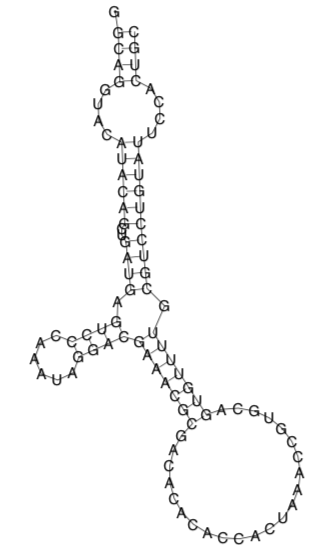

### Simulating	OBS	binding	for	AND-1	and	OR-1:

I will create 3 files for 3 scenarios: 

T/F: OBS1 bound and OBS2 free.
F/T: OBS 1 free and OBS2 bound.
T/T: OBS1 and OBS2 both bound.

In [8]:
a2_1 = open('and1_obs1_contraints.txt', 'r')
and1_obs1_contraints = a2_1.read()

pa2_1 = subprocess.run(['RNAfold', '-C'], input=bytes(and1_obs1_contraints, 'ascii'), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print(pa2_1.stdout.decode())

GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((..........................(((.(....))))...))))))).))))).....(((((....))))).))))))))......... (-33.90)



**This is the image for AND-1 when its target OBS-1 is bound:**

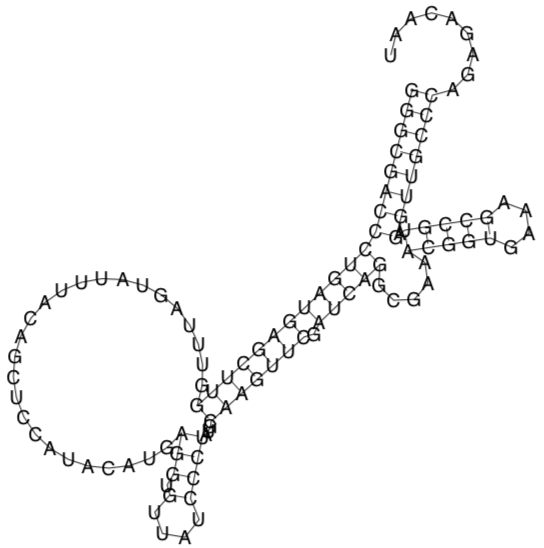

**This is the image from the paper:**

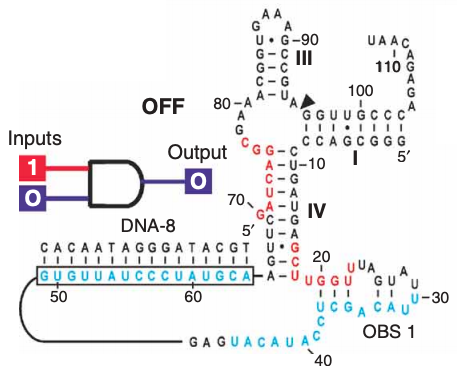

They look similar to each other.

In [9]:
a2_2 = open('and1_obs2_contraints.txt', 'r')
and1_obs2_contraints = a2_2.read()

pa2_2 = subprocess.run(['RNAfold', '-C'], input=bytes(and1_obs2_contraints, 'ascii'), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print(pa2_2.stdout.decode())

GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
(((((((((((((((((((((...(((.......))))))........................))))).))))).....(((((....))))).))))))))......... (-29.60)



**AND-1 when its target OBS-2 is bound:**

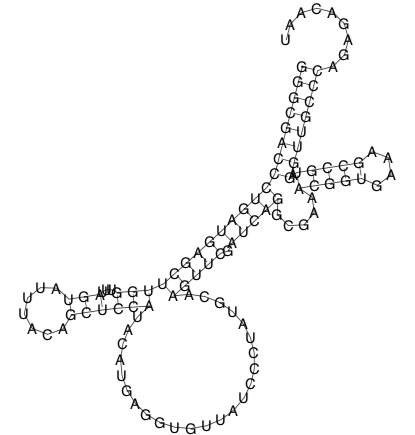

In [10]:
a2_12 = open('and1_2obs_contraints.txt', 'r')
and1_2obs_contraints = a2_12.read()

pa2_12 = subprocess.run(['RNAfold', '-C'], input=bytes(and1_2obs_contraints, 'ascii'), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print(pa2_12.stdout.decode())

GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((..............................................))))).))))).....(((((....))))).))))))))......... (-27.64)



**AND-1 when its target OBS-1 and OBS-2 are bound:**

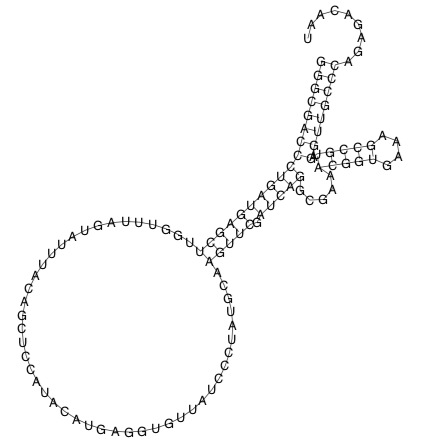

In [11]:
o2_1 = open('o1_obs1_contraints.txt', 'r')
o1_obs1_contraints = o2_1.read()

po2_1 = subprocess.run(['RNAfold', '-C'], input=bytes(o1_obs1_contraints, 'ascii'), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print(po2_1.stdout.decode())

GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((...........................)))...)).))))))).))))).....(((((....))))).)))))))) (-34.20)



**OR-1 when its target OBS-1 is bound:**

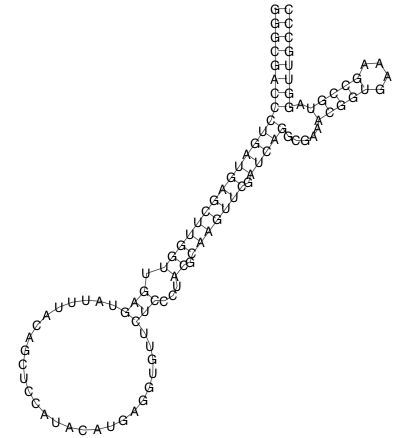

**According to my results, AND-1 and OR-1 riboswitches work as the paper claims.**